**Problem Statement: Telecom Customer Churn Prediction**
Customer churn is a critical issue faced by businesses in competitive markets, where retaining existing customers is significantly more cost-effective than acquiring new ones. The ability to predict customer churn accurately is essential for businesses to implement timely interventions and enhance customer satisfaction.

**Objective** -Build a machine learning model capable of predicting whether a customer will churn or not based on historical data.

**Scope** -The scope of customer churn prediction is wide and highly beneficial for businesses aiming to reduce churn and improve customer retention. It focuses on predicting which customers are likely to stop using a product or service, allowing businesses to take preventive actions to retain those customers.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [71]:
df=pd.read_csv("Telco-Customer-Churn.csv")

In [72]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The given dataset belongs to supervised learning as it has labeled data means both input and output is present in the dataset
so we will be using supervised learning algorithms - classification algorithm as the target variable churn has 2 class Yes and No

Applying Exploratory Data Analysis (EDA) 

In [73]:
df.shape

(7043, 21)

In [74]:
#drop customerID column
df.drop('customerID',axis=1,inplace=True)

In [75]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [76]:
#to check null values
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [77]:
#to check duplicates
df.duplicated().sum()

22

In [78]:
#to drop duplicate rows
df.drop_duplicates(inplace=True)

In [79]:
df.duplicated().sum()

0

In [80]:
#to check unique value in each columns
def unique_counts():
    for i in df.columns:
        print(i,df[i].unique())
        print()

unique_counts()

gender ['Female' 'Male']

SeniorCitizen [0 1]

Partner ['Yes' 'No']

Dependents ['No' 'Yes']

tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService ['No' 'Yes']

MultipleLines ['No phone service' 'No' 'Yes']

InternetService ['DSL' 'Fiber optic' 'No']

OnlineSecurity ['No' 'Yes' 'No internet service']

OnlineBackup ['Yes' 'No' 'No internet service']

DeviceProtection ['No' 'Yes' 'No internet service']

TechSupport ['No' 'Yes' 'No internet service']

StreamingTV ['No' 'Yes' 'No internet service']

StreamingMovies ['No' 'Yes' 'No internet service']

Contract ['Month-to-month' 'One year' 'Two year']

PaperlessBilling ['Yes' 'No']

PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]

TotalChar

In [81]:
#to check datatype
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [82]:
df["TotalCharges"].value_counts()

TotalCharges
          11
19.75      9
20.2       8
19.9       7
19.65      7
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: count, Length: 6531, dtype: int64

In [83]:
df[df["TotalCharges"]==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [84]:
#to fill TotalCharges which are unknown with null
df['TotalCharges'].replace(" ",np.nan,inplace=True)

In [85]:
#to change the datatyoe of TotalCharges to float
df['TotalCharges']=df['TotalCharges'].astype(float)

In [86]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [87]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [88]:
#to fill TotalCharges with median
m=df['TotalCharges'].median()
print('mean',m)
df['TotalCharges'].fillna(m,inplace=True)
df.isnull().sum()

mean 1403.875


gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

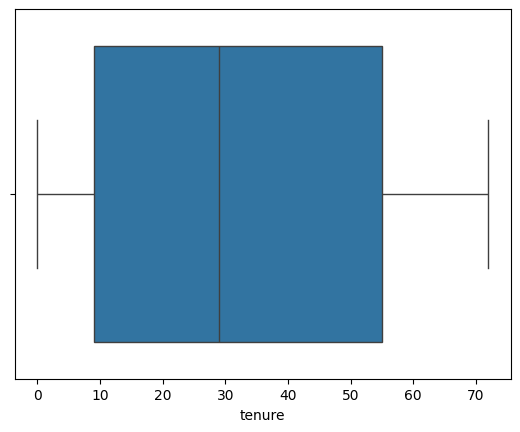

In [89]:
#to check outlier
sb.boxplot(data=df,x='tenure')
plt.show

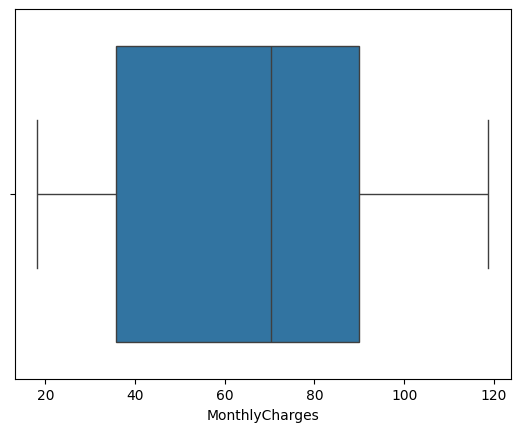

In [90]:
sb.boxplot(data=df,x='MonthlyCharges')
plt.show()

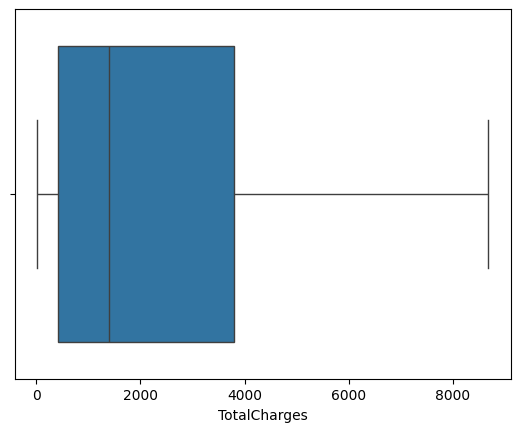

In [91]:
sb.boxplot(data=df,x='TotalCharges')
plt.show()

In [92]:
df['Churn'].value_counts()

Churn
No     5164
Yes    1857
Name: count, dtype: int64

In [93]:

from imblearn.over_sampling import RandomOverSampler

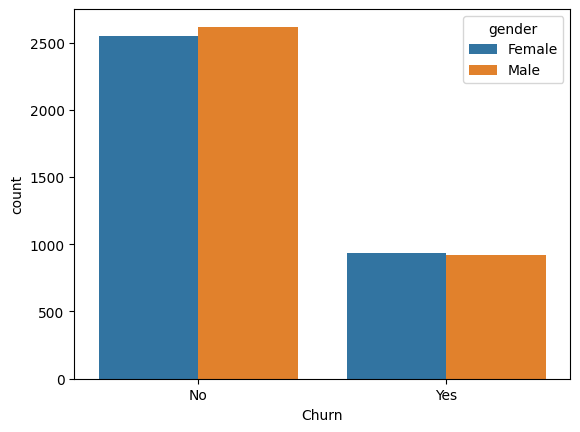

In [94]:
sb.countplot(data=df,x='Churn',hue='gender')
plt.show()

<Axes: xlabel='PaymentMethod', ylabel='count'>

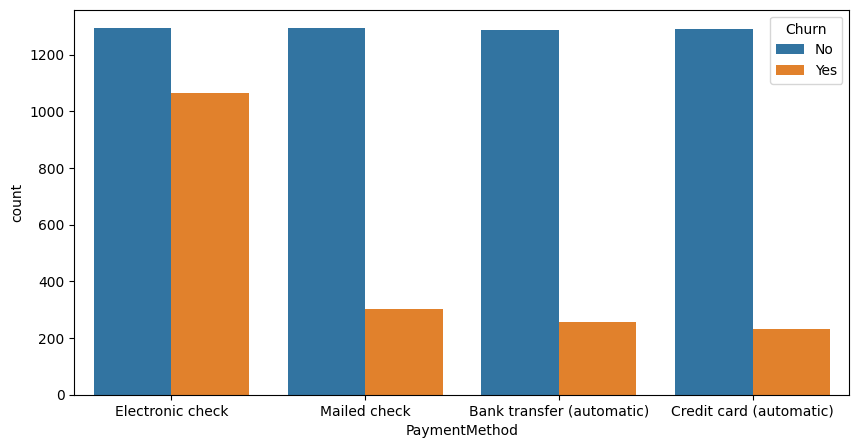

In [95]:
plt.figure(figsize=(10, 5))
sb.countplot(data=df,x='PaymentMethod',hue='Churn')

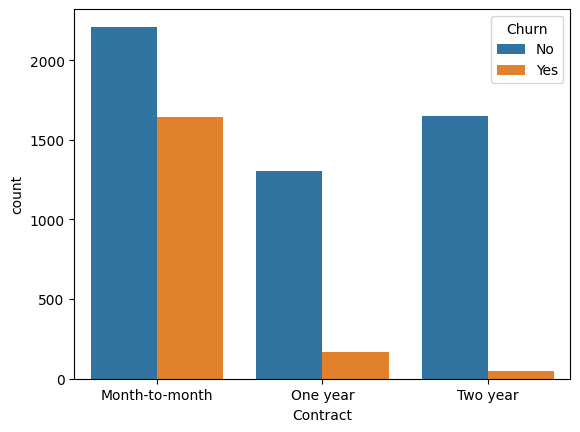

In [96]:
sb.countplot(data=df,x='Contract',hue='Churn')
plt.show()

In [97]:
#separate numeric type column and object type column from original dataframe df
#and hold in new dataframe df_num and df_cat respectively

df_num=df.select_dtypes(['int64','float64','int32'])
df_cat=df.select_dtypes(object)

In [98]:
#applyin labelencoder to convert the categorial type data to numeric type which the machine can understand

#import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

#apply labelencoder for df_cat dataframe
for col in df_cat:
    #create object of LabelEncoder class
    le=LabelEncoder()
    df_cat[col]=le.fit_transform(df_cat[col])

In [99]:
df_cat.dtypes

gender              int32
Partner             int32
Dependents          int32
PhoneService        int32
MultipleLines       int32
InternetService     int32
OnlineSecurity      int32
OnlineBackup        int32
DeviceProtection    int32
TechSupport         int32
StreamingTV         int32
StreamingMovies     int32
Contract            int32
PaperlessBilling    int32
PaymentMethod       int32
Churn               int32
dtype: object

In [100]:
#to merge 2 dataframe df_cat and df_num in new dataframe df1 
df1=pd.concat([df_cat,df_num],axis=1)        
df1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65


In [101]:
#performing the model

#select the input and output in the dataset df1
X=df1.drop('Churn',axis=1)
Y=df1['Churn']

In [102]:
X.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,0,2,70.70,151.65


In [103]:
# To train-test the data by spliting it into 70%- training data and 30% - testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [104]:
df1['Churn'].value_counts()

Churn
0    5164
1    1857
Name: count, dtype: int64

In [105]:
#As the data has imbalanced data we have to use RandomOverSampler to balance the data
#RandomOverSampler increases the number of samples in the minority class by duplicating examples 
#from the minority class until the class distribution is balanced.
from imblearn.over_sampling import RandomOverSampler

In [106]:
#create object of  RandomOverSampler() class
ros = RandomOverSampler() 

In [107]:
#apply randomoversampling for balance
X_train1,Y_train1=ros.fit_resample(X_train,Y_train)

In [108]:
X_test1,Y_test1=ros.fit_resample(X_test,Y_test)

In [109]:
pd.Series(Y_train1).value_counts() #check if not balance 

Churn
0    3582
1    3582
Name: count, dtype: int64

In [110]:
#Applying StandardScaler on input data

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()                                        
X_train1=ss.fit_transform(X_train1)          
X_test1=ss.transform(X_test1)

In [111]:
#creat a user defined function and passig the objet of classification algorithm

def create_model(model):         #create_model is a user defined function name, model is user defined object of classification algorithm
    model.fit(X_train1,Y_train1)      #train the model with 70% data
    Y_pred=model.predict(X_test1)    #test the model with 30% data
    #print confusion matrix
    cm=print(confusion_matrix(Y_test1,Y_pred))
    #print classification report
    print(classification_report(Y_test1,Y_pred))
    return model                         # to get the information gain because it is stored in the object

In [112]:
#applying logistic regression

from sklearn.linear_model import LogisticRegression
#create object of LogisticRegression
lr=LogisticRegression()

#call function
lr = create_model(lr)

[[1148  434]
 [ 299 1283]]
              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1582
           1       0.75      0.81      0.78      1582

    accuracy                           0.77      3164
   macro avg       0.77      0.77      0.77      3164
weighted avg       0.77      0.77      0.77      3164



In [113]:
#applying DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

#create object of DecisionTreeClassifier class
dt=DecisionTreeClassifier(random_state=1)                   #this will give result using gini index

#call the fuction
dt=create_model(dt) 

[[1300  282]
 [ 819  763]]
              precision    recall  f1-score   support

           0       0.61      0.82      0.70      1582
           1       0.73      0.48      0.58      1582

    accuracy                           0.65      3164
   macro avg       0.67      0.65      0.64      3164
weighted avg       0.67      0.65      0.64      3164



In [114]:
#to see the important features
IG=dt.feature_importances_
dict={'Input column':X.columns,"Information Gain":IG}
df2=pd.DataFrame(dict)
df2.sort_values('Information Gain',ascending=False)

,Input column,Information Gain
12,Contract,0.232739
17,MonthlyCharges,0.199909
18,TotalCharges,0.187426
16,tenure,0.104057
14,PaymentMethod,0.042944
6,OnlineSecurity,0.041870
13,PaperlessBilling,0.024149
4,MultipleLines,0.020056
0,gender,0.018981
9,TechSupport,0.017905


In [115]:
#applying DecisionTreeClassifier using entropy
dt1=DecisionTreeClassifier(criterion='entropy',random_state=1)                    #this will give result using entropy

#call the fuction
dt1=create_model(dt1)                   

[[1316  266]
 [ 792  790]]
              precision    recall  f1-score   support

           0       0.62      0.83      0.71      1582
           1       0.75      0.50      0.60      1582

    accuracy                           0.67      3164
   macro avg       0.69      0.67      0.66      3164
weighted avg       0.69      0.67      0.66      3164



In [116]:
#to see the important features
IG=dt1.feature_importances_
dict={'Input column':X.columns,"Information Gain":IG}
df2=pd.DataFrame(dict)
df2.sort_values('Information Gain',ascending=False)

,Input column,Information Gain
18,TotalCharges,0.210269
17,MonthlyCharges,0.209681
12,Contract,0.185212
16,tenure,0.110298
14,PaymentMethod,0.045175
6,OnlineSecurity,0.032967
0,gender,0.026944
1,Partner,0.025681
4,MultipleLines,0.022872
15,SeniorCitizen,0.020212


In [117]:
#as the DecisionTreeClassifier takes the input even if it give less information because of which the model becomes overfit
#to reduce this applying purning technique

#1)max_depth
#max_depth>=1 and max_depth<=8
#for i in range(1,9):
    #create object of DecisionTreeClassifier
#    dt=DecisionTreeClassifier(max_depth=i,random_state=1)    #by default gini index
#    print("Max depth : ",i)
    #call function
#    dt=create_model(dt)
#    print()

In [118]:
dt2=DecisionTreeClassifier(max_depth=5,random_state=1)     #by default gini index
dt2=create_model(dt2)

[[1167  415]
 [ 388 1194]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1582
           1       0.74      0.75      0.75      1582

    accuracy                           0.75      3164
   macro avg       0.75      0.75      0.75      3164
weighted avg       0.75      0.75      0.75      3164



In [119]:
dt3=DecisionTreeClassifier(max_depth=5,criterion='entropy',random_state=1)     
dt3=create_model(dt3)

[[1249  333]
 [ 444 1138]]
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1582
           1       0.77      0.72      0.75      1582

    accuracy                           0.75      3164
   macro avg       0.76      0.75      0.75      3164
weighted avg       0.76      0.75      0.75      3164



In [120]:
#applying 2nd purning technique
#2)min_samples_leaf

#for i in range(50,101):       
    #create object of DecisionTreeClassifier
#    dt2=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)    #by default gini index
#    print("min_samples_leaf: ",i)
    #call function
#    dt2=create_model(dt2)
#    print()

In [121]:
dt4=DecisionTreeClassifier(min_samples_leaf=83,criterion='entropy',random_state=1)     
dt4=create_model(dt4)

[[1177  405]
 [ 401 1181]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1582
           1       0.74      0.75      0.75      1582

    accuracy                           0.75      3164
   macro avg       0.75      0.75      0.75      3164
weighted avg       0.75      0.75      0.75      3164



In [122]:
dt5=DecisionTreeClassifier(min_samples_leaf=83,random_state=1)     #using gini index
dt5=create_model(dt5)

[[1184  398]
 [ 426 1156]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1582
           1       0.74      0.73      0.74      1582

    accuracy                           0.74      3164
   macro avg       0.74      0.74      0.74      3164
weighted avg       0.74      0.74      0.74      3164



In [123]:
#using various ensembling technique to increase the accuracy

#Bootstraping Ensembling technique
#use RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

#create object of RandomForestClassifier class min DecisionTree = 10 and max=100
#for i in range(10,101):
    #create object of RandomForestClassifier class
#    rfc=RandomForestClassifier(random_state=1,n_estimators=i)   
    #n_estimators inbuilt parameter  means no. of decision tree taken first will take 10 than 11 ...
#    print("no. of Decision Tree: ",i)
#    rfc=create_model(rfc)

In [124]:
rfc=RandomForestClassifier(random_state=1,n_estimators=43) 
rfc=create_model(rfc)


[[1352  230]
 [ 718  864]]
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      1582
           1       0.79      0.55      0.65      1582

    accuracy                           0.70      3164
   macro avg       0.72      0.70      0.69      3164
weighted avg       0.72      0.70      0.69      3164



In [125]:
# Ensembling technique : Boosting technique
#1) ADA Boost (Adaptor Boosting)
from sklearn.ensemble import AdaBoostClassifier

In [126]:
X.shape

(7021, 19)

In [127]:
#here input column is 19 
#maximum decison stump=19 and min decision stump = 1

#for i in range(1,20):
    #create object of AdaBoostClassifier class and passing value of parameter n_estimators
#    ada=AdaBoostClassifier(random_state=1,n_estimators=i)
#    print("No. of decision stump: ",i)
    #call the function
#    ada=create_model(ada)

In [128]:
ada=AdaBoostClassifier(random_state=1,n_estimators=16)
ada=create_model(ada)

[[1135  447]
 [ 336 1246]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1582
           1       0.74      0.79      0.76      1582

    accuracy                           0.75      3164
   macro avg       0.75      0.75      0.75      3164
weighted avg       0.75      0.75      0.75      3164



In [129]:
#2)Gradient Boosting
#use inbuilt class GradientBoostingClassifier 
from sklearn.ensemble import GradientBoostingClassifier

#Min DecisionTree  10 and max 100
#for i in range(10,101):    
      #create object of GradientBoostingClassifier class and pass the parameter
#    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
#    print("No. of Tree: ",i)
    #call function
#    gbc=create_model(gbc)

In [130]:
gbc=GradientBoostingClassifier(n_estimators=35,random_state=1)
gbc=create_model(gbc)

[[1137  445]
 [ 307 1275]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75      1582
           1       0.74      0.81      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.76      0.76      0.76      3164
weighted avg       0.76      0.76      0.76      3164



In [131]:
#3)ExtremeGradientBoosting (XGB) : similar as gradient boost

from xgboost import XGBClassifier

#XGBClassifier inbuilt class which is define in xgboost inbuilt package

#for i in range(10,101):
    
#create object of XGBClassifier class and pass the parameter
#    xgb=XGBClassifier(n_estimators=i,random_state=1,reg_alpha=1)  #reg_alpha=1 means true
#    print("No. of Tree: ",i)
    #call function
#    xgb=create_model(xgb)
    

In [132]:
xgb=XGBClassifier(n_estimators=10,random_state=1,reg_alpha=1)  
xgb=create_model(xgb)

[[1159  423]
 [ 369 1213]]
              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1582
           1       0.74      0.77      0.75      1582

    accuracy                           0.75      3164
   macro avg       0.75      0.75      0.75      3164
weighted avg       0.75      0.75      0.75      3164



In [133]:
#SVM - Support Vector Machine
from sklearn.svm import LinearSVC
#create object of LinearSVC
svc=LinearSVC(random_state=1)    #by default hard margin 
#call the function
svc=create_model(svc)

[[1126  456]
 [ 305 1277]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1582
           1       0.74      0.81      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.76      0.76      0.76      3164
weighted avg       0.76      0.76      0.76      3164



In [134]:
svc1=LinearSVC(random_state=1,C=0.98)      #passing the parameter to add external error : C value of C between 0-1
#call the function
svc1=create_model(svc1)

[[1126  456]
 [ 305 1277]]
              precision    recall  f1-score   support

           0       0.79      0.71      0.75      1582
           1       0.74      0.81      0.77      1582

    accuracy                           0.76      3164
   macro avg       0.76      0.76      0.76      3164
weighted avg       0.76      0.76      0.76      3164



In [135]:
#here no changes in recall and accuracy on adding external error also which means data is can't we divided by the straight line
#means data is non linear

#there are 2 types of non-linear function
#1)polynomial kernel function
#2)Radial basis kernel function


#1)polynomial kernel function
from sklearn.svm import SVC

#create object of svc class and pass the value of parameter kernel="poly"
poly_svc=SVC(random_state=1,kernel='poly')
#call the function
poly_svc=create_model(poly_svc)

[[1121  461]
 [ 366 1216]]
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1582
           1       0.73      0.77      0.75      1582

    accuracy                           0.74      3164
   macro avg       0.74      0.74      0.74      3164
weighted avg       0.74      0.74      0.74      3164



In [136]:
#2)Radial basis kernel function : in this data is separated by circle

#create object of svc class and pass the value of parameter kernel="rbf"
radial_svc=SVC(random_state=1,kernel='rbf')
#call the function
radial_svc=create_model(radial_svc)

[[1140  442]
 [ 373 1209]]
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1582
           1       0.73      0.76      0.75      1582

    accuracy                           0.74      3164
   macro avg       0.74      0.74      0.74      3164
weighted avg       0.74      0.74      0.74      3164



In [137]:
from sklearn.neighbors import KNeighborsClassifier
#for k in range(3,8,2):           #start= 3 end=8-1=7   step=2 bcoz we have to the odd number
#    Knc =KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2) 
    #value of k
#    print("value of k: ",k)
    #call function
#    Knc=create_model(Knc)

In [138]:
Knc=KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
Knc=create_model(Knc)

[[1042  540]
 [ 379 1203]]
              precision    recall  f1-score   support

           0       0.73      0.66      0.69      1582
           1       0.69      0.76      0.72      1582

    accuracy                           0.71      3164
   macro avg       0.71      0.71      0.71      3164
weighted avg       0.71      0.71      0.71      3164

